## Simple Chatbot using Ollama

### Imports

In [4]:
import os
from typing import TypedDict, Literal, Annotated
from langchain_ollama import ChatOllama
from IPython.display import Image,display
from langgraph.graph.message import add_messages
from langgraph.graph import StateGraph,START,END
from dotenv import load_dotenv

load_dotenv()

OLLAMA_BASE_URL = os.getenv("OLLAMA_BASE_URL")

#print(OLLAMA_BASE_URL)

In [6]:
llm = ChatOllama(model="granite4:tiny-h", base_url=OLLAMA_BASE_URL)
llm.invoke("Hey, How are you?")

AIMessage(content="I'm doing well, thank you for asking! It's always nice to have friendly conversations. Is there anything I can assist you with today?", additional_kwargs={}, response_metadata={'model': 'granite4:tiny-h', 'created_at': '2026-02-20T06:05:07.293842Z', 'done': True, 'done_reason': 'stop', 'total_duration': 3378568000, 'load_duration': 2997954900, 'prompt_eval_count': 14, 'prompt_eval_duration': 53763100, 'eval_count': 30, 'eval_duration': 318298400, 'logprobs': None, 'model_name': 'granite4:tiny-h', 'model_provider': 'ollama'}, id='lc_run--019c79a6-d7f0-7862-baf5-37e511fcca29-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 14, 'output_tokens': 30, 'total_tokens': 44})

## Let's create the nodes, edges and graph

In [7]:
class State(TypedDict):
    graph_info: Annotated[list, add_messages]

**Key Concepts:**

- **`TypedDict`** - Defines a dictionary schema with typed keys for better IDE support and type checking

- **`Annotated[list, add_messages]`** - A special type hint where:
  - `list` is the base type (stores chat messages)
  - `add_messages` is a **reducer function** that controls how updates are merged

- **`add_messages` reducer** - Built-in LangGraph function that:
  - **Appends** new messages to the list (instead of replacing)
  - Handles message deduplication and ID tracking
  - Maintains conversation history across the graph

- **`State`** - The shared schema that flows through all nodes:
  - Each node receives this state as input
  - Each node returns updates to this state
  - `graph_info` accumulates all chat messages throughout the conversation

In [8]:
def chatbot(state: State):
    return {"graph_info":[llm.invoke(state["graph_info"])]}

In [10]:
## Build Graph
graph = StateGraph(State)

# Add nodes to the graph
graph.add_node("chatbot", chatbot)

# Add edges to the graph
graph.add_edge(START, "chatbot")
graph.add_edge("chatbot", END)

# Compile the graph
graph_builder = graph.compile()

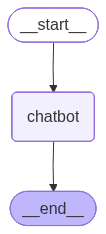

In [11]:
## Display
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [12]:
graph_builder.invoke({"graph_info":"I'm so excited to chat with you!"})

{'graph_info': [HumanMessage(content="I'm so excited to chat with you!", additional_kwargs={}, response_metadata={}, id='c06057cd-613b-42cc-9204-27211e024501'),
  AIMessage(content="Thank you, I'm glad to have this opportunity to chat as well. What would you like to talk about? Is there anything in particular that's on your mind or any questions you'd like me to help answer? I'm here for you and happy to engage in discussion on a wide range of topics!", additional_kwargs={}, response_metadata={'model': 'granite4:tiny-h', 'created_at': '2026-02-20T06:13:16.1556311Z', 'done': True, 'done_reason': 'stop', 'total_duration': 2465181400, 'load_duration': 1746569900, 'prompt_eval_count': 17, 'prompt_eval_duration': 32840900, 'eval_count': 63, 'eval_duration': 659368000, 'logprobs': None, 'model_name': 'granite4:tiny-h', 'model_provider': 'ollama'}, id='lc_run--019c79ae-512f-77f1-9433-3a0f64256c76-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 17, 'output_tokens': 63

In [13]:
graph_builder.invoke({"graph_info":"I'm planning to learn langgraph"})

{'graph_info': [HumanMessage(content="I'm planning to learn langgraph", additional_kwargs={}, response_metadata={}, id='e66ce6c1-3a06-47ba-ae12-6dbf97eb392d'),
  AIMessage(content="That's great! LangGraph is a powerful framework for building conversational AI applications. It provides a high-level API and tools for creating complex dialogue flows, managing state, and handling user interactions.\n\nHere are some steps you can follow to get started with LangGraph:\n\n1. Familiarize yourself with the basics of natural language processing (NLP) and conversational AI concepts.\n   - Understand how chatbots work and the different components involved in building a conversation flow.\n   - Learn about intent classification, entity extraction, and dialogue management.\n\n2. Set up your development environment:\n   - Install Python on your machine if you haven't already.\n   - Create a virtual environment to isolate your project dependencies.\n   - Install LangGraph by running `pip install langg

In [17]:
# Invoke the graph and store the result
result = graph_builder.invoke({"graph_info": "Tell me about LangGraph"})
print(result["graph_info"])

[HumanMessage(content='Tell me about LangGraph', additional_kwargs={}, response_metadata={}, id='7fa17443-f520-40a4-a382-44723d091c95'), AIMessage(content='LangGraph is an open-source Python library for building language models and generating text using graph-based architectures. It provides a flexible framework for constructing, training, and deploying various types of language models, including sequence-to-sequence models like Transformers.\n\nKey features of LangGraph include:\n\n1. Graph-based architecture: LangGraph allows you to define your language model as a directed acyclic graph (DAG), where each node represents an operation or a subgraph, and edges represent the flow of data between these nodes. This enables you to create complex pipeline architectures for text generation tasks.\n\n2. Modular design: The library encourages modularity by allowing you to break down your language model into smaller reusable components called "subgraphs." These subgraphs can be easily combined a

## Streaming response

In [19]:
for event in graph_builder.stream({"graph_info": "What are the main advantages of langchain?"}):
    print(event)

{'chatbot': {'graph_info': [AIMessage(content='LangGraph is a Python library designed for building large language models (LLMs) and natural language processing (NLP) applications. Here are some of its main advantages:\n\n1. Flexibility: LangGraph provides a flexible framework for designing and implementing complex NLP workflows, allowing developers to create custom pipelines tailored to their specific needs.\n\n2. Graph-based architecture: The library uses a graph-based architecture, which enables the representation of NLP tasks as interconnected nodes and edges. This allows for modular design, easy debugging, and efficient execution of multiple components in parallel or sequentially.\n\n3. Reusability: LangGraph encourages code reuse by providing a set of reusable graph components and abstractions. Developers can create custom components or utilize existing ones to build their NLP applications more efficiently.\n\n4. Integration with popular frameworks: LangGraph seamlessly integrates

## Streaming Modes

LangGraph provides different `stream_mode` options to control how messages are streamed:

- **`"values"`** - Streams full state after each node execution
  - Returns all messages (both Human and AI)
  - Useful for seeing the complete conversation history

- **`"updates"`** - Streams only the latest state updates
  - Returns only the most recent messages
  - Useful for incremental updates

Each mode serves different purposes in building chatbots.

In [20]:
for event in graph_builder.stream({"graph_info": "What are the main advantages of langchain?"}, stream_mode="values"):
    print(event)

{'graph_info': [HumanMessage(content='What are the main advantages of langgraph?', additional_kwargs={}, response_metadata={}, id='eae87962-7b45-409f-84e2-a1f99e67a18a')]}
{'graph_info': [HumanMessage(content='What are the main advantages of langgraph?', additional_kwargs={}, response_metadata={}, id='eae87962-7b45-409f-84e2-a1f99e67a18a'), AIMessage(content='Langchain is a popular framework for building applications with large language models (LLMs) like ChatGPT. Here are some of its main advantages:\n\n1. Modular design: Langchain provides a modular architecture that allows developers to easily combine and chain different components, such as prompts, models, and tools, to create complex LLM-powered applications.\n\n2. Pre-built components: It offers a wide range of pre-built components, including prompts, chains, agents, and tool integrations, which can be used out-of-the-box or customized to suit specific needs. This saves development time and effort.\n\n3. Multi-model support: Lang

In [21]:
for event in graph_builder.stream({"graph_info": "What are the main advantages of langchain?"}, stream_mode="updates"):
    print(event)

{'chatbot': {'graph_info': [AIMessage(content="Langchain is a framework for developing applications powered by language models. It provides a set of abstractions and tools to help developers easily integrate large language models (LLMs) into their applications. Here are some of the main advantages of using Langchain:\n\n1. Modular architecture: Langchain follows a modular approach, allowing you to compose different components such as prompts, chains, agents, and retrievers to create complex LLM-powered applications. This modularity makes it easier to build, test, and iterate on your application.\n\n2. Abstractions for common tasks: Langchain provides abstractions for commonly used patterns and tasks in LLM-based applications, such as prompt templating, tool calling, memory management, and agent orchestration. These abstractions simplify the development process and reduce the amount of boilerplate code you need to write.\n\n3. Integration with various LLM providers: Langchain supports i